<a href="https://colab.research.google.com/github/madhusowmya/madhusowmya.github.io/blob/master/HW4_CNN_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np # linear algebra
import pandas as pd

In [18]:
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
from google.colab import drive
drive.mount('/content/drive')
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Seperating the independent feature as y
y = train['label']
train = train.drop('label', axis =1)

In [21]:
#Preprocessing the Data
train=train/225.0
test = test/225.0
train = np.array(train)
test= np.array(test)
train = train.reshape(train.shape[0], 28, 28,1)
test = test.reshape(test.shape[0], 28, 28,1)

#Splitting the data into training and validation 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train, y, test_size=0.2)

#Converting the train and validation labels to one-hot encodings
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=10)

In [22]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [23]:
# from keras.utils import plot_model
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
# from IPython.display import Image
# Image("model.png")

SGD 
parameters: learning rate =0.1, momentum =0.9

In [24]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.SGD(lr=0.1, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)

In [26]:
history_SGD = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/15
  2/525 [..............................] - ETA: 13s - loss: 2.9979 - accuracy: 0.1016

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 27s 52ms/step - loss: 0.5265 - accuracy: 0.8295 - val_loss: 0.0835 - val_accuracy: 0.9761
Epoch 2/15
525/525 [==============================] - 27s 52ms/step - loss: 0.1555 - accuracy: 0.9510 - val_loss: 0.0706 - val_accuracy: 0.9769
Epoch 3/15
525/525 [==============================] - 27s 51ms/step - loss: 0.1273 - accuracy: 0.9607 - val_loss: 0.1358 - val_accuracy: 0.9599
Epoch 4/15
525/525 [==============================] - 27s 51ms/step - loss: 0.1081 - accuracy: 0.9668 - val_loss: 0.0458 - val_accuracy: 0.9871
Epoch 5/15
525/525 [==============================] - 27s 51ms/step - loss: 0.0896 - accuracy: 0.9729 - val_loss: 0.0604 - val_accuracy: 0.9821
Epoch 6/15
525/525 [==============================] - 27s 51ms/step - loss: 0.0843 - accuracy: 0.9743 - val_loss: 0.0541 - val_accuracy: 0.9840
Epoch 7/15
525/525 [==============================] - 27s 51ms/step - loss: 0.0785 - accuracy: 0.9761 - val_loss: 0.0535 - val_accuracy: 0.9850
Epo

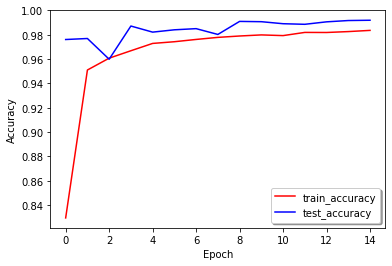

In [27]:
plt.plot(history_SGD.history['accuracy'], color='r')
plt.plot(history_SGD.history['val_accuracy'], color='b')
plt.legend(('train_accuracy','test_accuracy'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

RMSProp

In [28]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [29]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.RMSprop(lr=0.001, momentum=0.0,rho=0.9,epsilon=1e-07), loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)

In [31]:
history_RMS = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/15
  2/525 [..............................] - ETA: 14s - loss: 2.8793 - accuracy: 0.0781

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 32s 61ms/step - loss: 0.3392 - accuracy: 0.8930 - val_loss: 0.1127 - val_accuracy: 0.9694
Epoch 2/15
525/525 [==============================] - 32s 61ms/step - loss: 0.1274 - accuracy: 0.9593 - val_loss: 0.0784 - val_accuracy: 0.9769
Epoch 3/15
525/525 [==============================] - 32s 62ms/step - loss: 0.0976 - accuracy: 0.9693 - val_loss: 0.0640 - val_accuracy: 0.9824
Epoch 4/15
525/525 [==============================] - 32s 62ms/step - loss: 0.0861 - accuracy: 0.9734 - val_loss: 0.0495 - val_accuracy: 0.9860
Epoch 5/15
525/525 [==============================] - 32s 61ms/step - loss: 0.0735 - accuracy: 0.9773 - val_loss: 0.0573 - val_accuracy: 0.9829
Epoch 6/15
525/525 [==============================] - 32s 61ms/step - loss: 0.0676 - accuracy: 0.9783 - val_loss: 0.0377 - val_accuracy: 0.9880
Epoch 7/15
525/525 [==============================] - 32s 61ms/step - loss: 0.0653 - accuracy: 0.9796 - val_loss: 0.0529 - val_accuracy: 0.9851
Epo

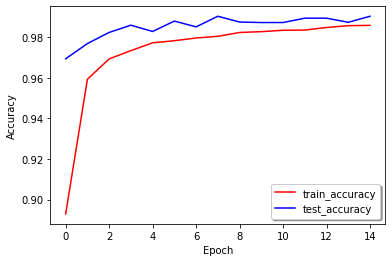

In [32]:
plt.plot(history_RMS.history['accuracy'], color='r')
plt.plot(history_RMS.history['val_accuracy'], color='b')
plt.legend(('train_accuracy','test_accuracy'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


Adam


In [33]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [34]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam'),loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)

In [36]:
history_Adam = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 2.8481 - accuracy: 0.0781

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 27s 51ms/step - loss: 0.3682 - accuracy: 0.8797 - val_loss: 0.0880 - val_accuracy: 0.9748
Epoch 2/15
525/525 [==============================] - 27s 52ms/step - loss: 0.1386 - accuracy: 0.9564 - val_loss: 0.1611 - val_accuracy: 0.9546
Epoch 3/15
525/525 [==============================] - 27s 51ms/step - loss: 0.1154 - accuracy: 0.9643 - val_loss: 0.0587 - val_accuracy: 0.9835
Epoch 4/15
525/525 [==============================] - 27s 51ms/step - loss: 0.0979 - accuracy: 0.9692 - val_loss: 0.0615 - val_accuracy: 0.9833
Epoch 5/15
525/525 [==============================] - 27s 51ms/step - loss: 0.0893 - accuracy: 0.9719 - val_loss: 0.1063 - val_accuracy: 0.9699
Epoch 6/15
525/525 [==============================] - 27s 51ms/step - loss: 0.0826 - accuracy: 0.9750 - val_loss: 0.0529 - val_accuracy: 0.9860
Epoch 7/15
525/525 [==============================] - 27s 51ms/step - loss: 0.0786 - accuracy: 0.9765 - val_loss: 0.0509 - val_accuracy: 0.9864
Epo

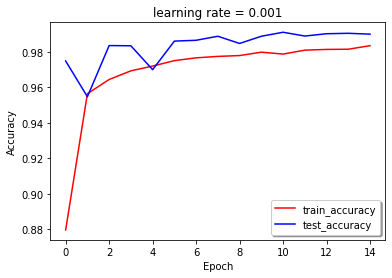

In [37]:
plt.plot(history_Adam.history['accuracy'], color='r')
plt.plot(history_Adam.history['val_accuracy'], color='b')
plt.legend(('train_accuracy','test_accuracy'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('learning rate = 0.001')
plt.show()


Adamax

In [38]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
             
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [39]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,name='Adamax'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adamax = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  2/525 [..............................] - ETA: 15s - loss: 2.8057 - accuracy: 0.1562

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 27s 52ms/step - loss: 0.5718 - accuracy: 0.8240 - val_loss: 0.0978 - val_accuracy: 0.9742
Epoch 2/15
525/525 [==============================] - 27s 52ms/step - loss: 0.1811 - accuracy: 0.9466 - val_loss: 0.0757 - val_accuracy: 0.9776
Epoch 3/15
525/525 [==============================] - 27s 52ms/step - loss: 0.1329 - accuracy: 0.9592 - val_loss: 0.0775 - val_accuracy: 0.9767
Epoch 4/15
525/525 [==============================] - 27s 52ms/step - loss: 0.1136 - accuracy: 0.9651 - val_loss: 0.0493 - val_accuracy: 0.9863
Epoch 5/15
525/525 [==============================] - 27s 52ms/step - loss: 0.0956 - accuracy: 0.9711 - val_loss: 0.0432 - val_accuracy: 0.9873
Epoch 6/15
525/525 [==============================] - 28s 53ms/step - loss: 0.0883 - accuracy: 0.9730 - val_loss: 0.0486 - val_accuracy: 0.9856
Epoch 7/15
525/525 [==============================] - 27s 52ms/step - loss: 0.0792 - accuracy: 0.9753 - val_loss: 0.0346 - val_accuracy: 0.9893
Epo

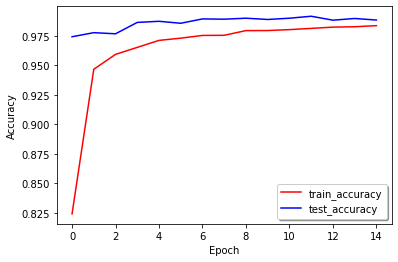

In [40]:
plt.plot(history_Adamax.history['accuracy'], color='r')
plt.plot(history_Adamax.history['val_accuracy'], color='b')
plt.legend(('train_accuracy','test_accuracy'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


AdaGrad


In [41]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [42]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.Adagrad(learning_rate=0.001,initial_accumulator_value=0.1, epsilon=1e-07,name='Adagrad'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adagrad = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 2.9221 - accuracy: 0.0938

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 26s 50ms/step - loss: 1.3983 - accuracy: 0.5392 - val_loss: 0.3373 - val_accuracy: 0.9230
Epoch 2/15
525/525 [==============================] - 27s 52ms/step - loss: 0.7106 - accuracy: 0.7788 - val_loss: 0.1966 - val_accuracy: 0.9488
Epoch 3/15
525/525 [==============================] - 27s 51ms/step - loss: 0.5493 - accuracy: 0.8299 - val_loss: 0.1562 - val_accuracy: 0.9580
Epoch 4/15
525/525 [==============================] - 26s 50ms/step - loss: 0.4545 - accuracy: 0.8647 - val_loss: 0.1368 - val_accuracy: 0.9621
Epoch 5/15
525/525 [==============================] - 27s 51ms/step - loss: 0.4013 - accuracy: 0.8798 - val_loss: 0.1243 - val_accuracy: 0.9656
Epoch 6/15
525/525 [==============================] - 27s 51ms/step - loss: 0.3590 - accuracy: 0.8920 - val_loss: 0.1118 - val_accuracy: 0.9682
Epoch 7/15
525/525 [==============================] - 26s 50ms/step - loss: 0.3280 - accuracy: 0.9029 - val_loss: 0.1071 - val_accuracy: 0.9686
Epo

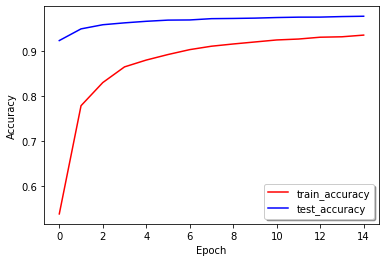

In [43]:
plt.plot(history_Adagrad.history['accuracy'], color='r')
plt.plot(history_Adagrad.history['val_accuracy'], color='b')
plt.legend(('train_accuracy','test_accuracy'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


Adadelta

In [44]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [45]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-07,name='Adadelta'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adadelta = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  2/525 [..............................] - ETA: 13s - loss: 2.9431 - accuracy: 0.1016

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 26s 50ms/step - loss: 2.8712 - accuracy: 0.1197 - val_loss: 2.1444 - val_accuracy: 0.2712
Epoch 2/15
525/525 [==============================] - 27s 51ms/step - loss: 2.7117 - accuracy: 0.1497 - val_loss: 1.9558 - val_accuracy: 0.3711
Epoch 3/15
525/525 [==============================] - 27s 51ms/step - loss: 2.5608 - accuracy: 0.1813 - val_loss: 1.7861 - val_accuracy: 0.4494
Epoch 4/15
525/525 [==============================] - 26s 50ms/step - loss: 2.4395 - accuracy: 0.2107 - val_loss: 1.6229 - val_accuracy: 0.5394
Epoch 5/15
525/525 [==============================] - 26s 50ms/step - loss: 2.3275 - accuracy: 0.2429 - val_loss: 1.4810 - val_accuracy: 0.6082
Epoch 6/15
525/525 [==============================] - 26s 50ms/step - loss: 2.2193 - accuracy: 0.2726 - val_loss: 1.3580 - val_accuracy: 0.6582
Epoch 7/15
525/525 [==============================] - 26s 50ms/step - loss: 2.1267 - accuracy: 0.2961 - val_loss: 1.2432 - val_accuracy: 0.6929
Epo

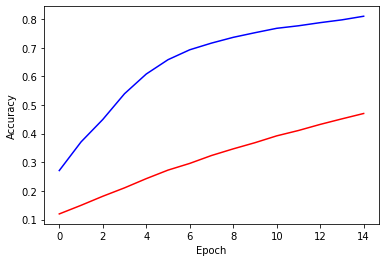

In [46]:
plt.plot(history_Adadelta.history['accuracy'], color='r')
plt.plot(history_Adadelta.history['val_accuracy'], color='b')
#plt.legend(('train_accuracy','test_accuracy'),loc = 'lower right',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


NAdam

In [47]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [48]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.Nadam(learning_rate=0.001,epsilon=1e-07,name='NAdam'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_NAdam = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 2.7898 - accuracy: 0.1094

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 34s 64ms/step - loss: 0.3755 - accuracy: 0.8814 - val_loss: 0.0749 - val_accuracy: 0.9782
Epoch 2/15
525/525 [==============================] - 34s 65ms/step - loss: 0.1401 - accuracy: 0.9579 - val_loss: 0.0564 - val_accuracy: 0.9821
Epoch 3/15
525/525 [==============================] - 33s 64ms/step - loss: 0.1022 - accuracy: 0.9685 - val_loss: 0.0485 - val_accuracy: 0.9846
Epoch 4/15
525/525 [==============================] - 34s 65ms/step - loss: 0.0902 - accuracy: 0.9729 - val_loss: 0.0486 - val_accuracy: 0.9864
Epoch 5/15
525/525 [==============================] - 34s 65ms/step - loss: 0.0859 - accuracy: 0.9732 - val_loss: 0.0840 - val_accuracy: 0.9743
Epoch 6/15
525/525 [==============================] - 34s 64ms/step - loss: 0.0751 - accuracy: 0.9762 - val_loss: 0.0613 - val_accuracy: 0.9801
Epoch 7/15
525/525 [==============================] - 33s 64ms/step - loss: 0.0666 - accuracy: 0.9793 - val_loss: 0.0687 - val_accuracy: 0.9806
Epo

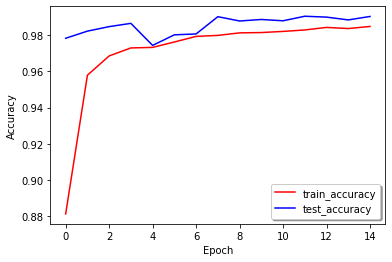

In [49]:
plt.plot(history_NAdam.history['accuracy'], color='r')
plt.plot(history_NAdam.history['val_accuracy'], color='b')
plt.legend(('train_accuracy','test_accuracy'),loc = 'lower right',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


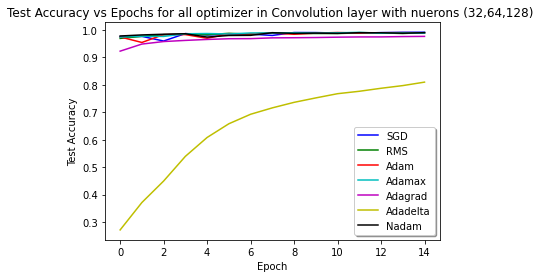

In [50]:
plt.plot(history_SGD.history['val_accuracy'], color='b')
plt.plot(history_RMS.history['val_accuracy'], color='g')
plt.plot(history_Adam.history['val_accuracy'], color='r')
plt.plot(history_Adamax.history['val_accuracy'], color='c')
plt.plot(history_Adagrad.history['val_accuracy'], color='m')
plt.plot(history_Adadelta.history['val_accuracy'], color='y')
plt.plot(history_NAdam.history['val_accuracy'], color='k')
plt.legend(('SGD','RMS','Adam','Adamax','Adagrad','Adadelta','Nadam'),loc = 'best',shadow = True)
plt.ylabel('Test Accuracy')
plt.xlabel('Epoch')
plt.title('Test Accuracy vs Epochs for all optimizer in Convolution layer with nuerons (32,64,128) ')
plt.show()
# fig , ax = plt.subplots()
# y1 = history_SGD.history['val_accuracy']
# y2 = history_RMS.history['val_accuracy']
# y3 = history_Adam.history['val_accuracy']
# y4 = history_Adamax.history['val_accuracy']
# y5 = history_Adagrad.history['val_accuracy']
# y6 = history_Adadelta.history['val_accuracy']
# y7 = history_NAdam.history['val_accuracy']
# x = np.arange(start=1, stop=16, step=1)
# plt.ylim(0.0,1.1)
# plt.plot(x, y1, y2, y3, y4, y5, y6,y7)
# plt.legend(('SGD','RMS','Adam','Adamax','Adagrad','Adadelta','Nadam'),loc = 'best',shadow = True)
# plt.ylabel('Test Accuracy')
# plt.xlabel('Epoch')
# plt.title('Test Accuracy for')
# plt.show()


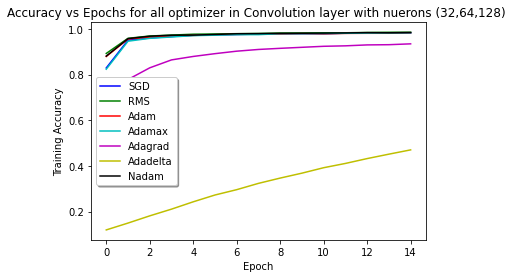

In [51]:
plt.plot(history_SGD.history['accuracy'], color='b')
plt.plot(history_RMS.history['accuracy'], color='g')
plt.plot(history_Adam.history['accuracy'], color='r')
plt.plot(history_Adamax.history['accuracy'], color='c')
plt.plot(history_Adagrad.history['accuracy'], color='m')
plt.plot(history_Adadelta.history['accuracy'], color='y')
plt.plot(history_NAdam.history['accuracy'], color='k')
plt.legend(('SGD','RMS','Adam','Adamax','Adagrad','Adadelta','Nadam'),loc = 'best',shadow = True)
plt.title('Accuracy vs Epochs for all optimizer in Convolution layer with nuerons (32,64,128) ')
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.show()



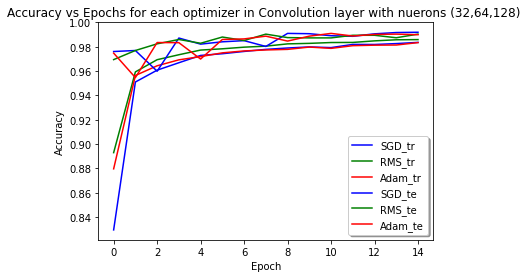

In [52]:
plt.plot(history_SGD.history['accuracy'], color='b')
plt.plot(history_RMS.history['accuracy'], color='g')
plt.plot(history_Adam.history['accuracy'], color='r')

plt.plot(history_SGD.history['val_accuracy'], color='b')
plt.plot(history_RMS.history['val_accuracy'], color='g')
plt.plot(history_Adam.history['val_accuracy'], color='r')


plt.legend(('SGD_tr','RMS_tr','Adam_tr','SGD_te','RMS_te','Adam_te'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy vs Epochs for each optimizer in Convolution layer with nuerons (32,64,128) ')
plt.show()

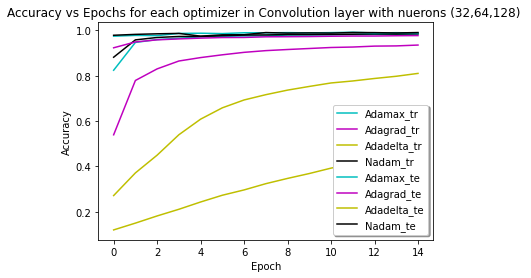

In [53]:
plt.plot(history_Adamax.history['accuracy'], color='c')
plt.plot(history_Adagrad.history['accuracy'], color='m')
plt.plot(history_Adadelta.history['accuracy'], color='y')
plt.plot(history_NAdam.history['accuracy'], color='k')
plt.plot(history_Adamax.history['val_accuracy'], color='c')
plt.plot(history_Adagrad.history['val_accuracy'], color='m')
plt.plot(history_Adadelta.history['val_accuracy'], color='y')
plt.plot(history_NAdam.history['val_accuracy'], color='k')
plt.legend(('Adamax_tr','Adagrad_tr','Adadelta_tr','Nadam_tr','Adamax_te','Adagrad_te','Adadelta_te','Nadam_te'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy vs Epochs for each optimizer in Convolution layer with nuerons (32,64,128) ')
plt.show()